## 弹性网络

1. 弹性网络模型拟合及预测
2. 多任务弹性网络模型拟合及预测

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import MultiTaskElasticNet

class elastic():
    def __init__(self,path):
        self.path = path
        self.data = pd.read_csv(self.path)
        self.features = set(self.data.columns)

        print(f"You are using sklearn:{sklearn.__version__}.")
        print(f"Nice to see you! This project is designed as Sklearn Class 2.")

    def elsastic_net(self,target,x,params,test_ratio = 0.,random_seed = 0):
        '''
        生成弹性网络模型 , 返回为指定模型;

        :param target(str list): 回归因变量(此时只能有一个);
        :param x(str list): 回归自变量;
        :param test_ratio(float): 0~1数值 , 测试数据比例 , 设置为0时则默认训练用全量数据;
        :param random_seed(int): 随机种子;  
        :param params(dict): 所使用的参数字典;
        :return: 拟合后的模型enet
        '''
        # 这里采用了与之前的 sklearn 不同的架构，体现在 params 更自由定义
        if len(target) != 1:
            print("Not supported target!")
            return -1
        if set(list(x)).issubset(self.features) and set(list(target)).issubset(self.features):
            y = self.data[target]
            X = self.data[list(x)]
            if test_ratio:
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=random_seed)
            else:
                X_train, y_train = X,y
            print("+"*60)
            print(f"You are using n_samples: {X.shape[0]} and n_features: {X.shape[1]} to train!") 
            print(f"Hyper parameters: {list(params.keys())}")
            
            enet = ElasticNet()
            enet.set_params(**params)
            enet = enet.fit(X_train.values, y_train, sample_weight=None, check_input=True)
            # use X_train.values indstead of X_train will mute the warnings

            if test_ratio:
                print("+"*60)
                print(f"Score on test set is {enet.score(X_test.values, y_test, sample_weight=None)}")
            return enet
        else:
            print("Please check your input args!")
            return -1
    
    def multi_elsastic_net(self,target,x,params,test_ratio = 0.,random_seed = 0):
        '''
        生成多任务弹性网络模型 , 返回为指定模型;

        :param target(str list): 回归因变量;
        :param x(str list): 回归自变量;
        :param test_ratio(float): 0~1数值 , 测试数据比例 , 设置为0时则默认训练用全量数据;
        :param random_seed(int): 随机种子;  
        :param params(dict): 所使用的参数字典;
        :return: 拟合后的模型mten
        '''
        if set(list(x)).issubset(self.features) and set(list(target)).issubset(self.features):
            y = self.data[list(target)]
            X = self.data[list(x)]
            if test_ratio:
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=random_seed)
            else:
                X_train, y_train = X,y
            print("+"*60)
            print(f"You are using n_samples: {X.shape[0]} and n_features: {X.shape[1]} to train!") 
            print(f"Hyper parameters: {list(params.keys())}")
            
            mten = MultiTaskElasticNet()
            mten.set_params(**params)
            mten = mten.fit(X_train.values, y_train)

            if test_ratio:
                print("+"*60)
                print(f"Score on test set is {mten.score(X_test.values, y_test, sample_weight=None)}")
            return mten
        else:
            print("Please check your input args!")
            return -1

if __name__ == '__main__':
    data = elastic("./2022期末数据/confirmes.csv")

    # 弹性网络模型拟合
    params = {"alpha":1.0, "l1_ratio":0.5, "fit_intercept":True, "precompute":False, \
            "max_iter":1000, "copy_X":True, "tol":1e-4, "warm_start":False, "positive":False, \
            "selection":"cyclic"}
    model = data.elsastic_net(target = ['contact'],x = ['mort','gueri'], params=params, test_ratio=0.3)
    print(f"Predict value when ['mort','gueri'] = [250,10000]:{model.predict([[250,10000]])}")

    # 多任务弹性网络模型拟合
    params = {"alpha":1.0, "l1_ratio":0.5, "fit_intercept":True, "max_iter":1000, \
            "copy_X":True, "tol":1e-4, "warm_start":False,  "random_state":False, "selection":"cyclic"}
    model_m = data.multi_elsastic_net(target = ['cas','contact'],x = ['communautaire','mort','gueri'], params=params, test_ratio=0.3)
    print(f"Predict values when ['communautaire','mort','gueri'] = [4,250,10000]:{model_m.predict([[4,250,10000]])}")




You are using sklearn:1.0.2.
Nice to see you! This project is designed as Sklearn Class 2.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
You are using n_samples: 235 and n_features: 2 to train!
Hyper parameters: ['alpha', 'l1_ratio', 'fit_intercept', 'precompute', 'max_iter', 'copy_X', 'tol', 'warm_start', 'positive', 'selection']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Score on test set is 0.021467686178646694
Predict value when ['mort','gueri'] = [250,10000]:[32.82221635]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
You are using n_samples: 235 and n_features: 3 to train!
Hyper parameters: ['alpha', 'l1_ratio', 'fit_intercept', 'max_iter', 'copy_X', 'tol', 'warm_start', 'random_state', 'selection']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Score on test set is 0.35604579430190353
Predict values when ['communautaire','mort','gueri'] = [4,250,10000]:[[27.59085898 20.3436984 ]]


## 多元回归：手动实现
1. 支持多元线性回归模型的拟合（区间估计）
2. 支持各种拟合优度数据的输出：AIC, BIC, R2, F统计量等
3. 支持预测（区间估计）
4. 支持带有线性约束条件的回归
5. `statsmodels` 库 `api` 的实现和比较

注意：
1. 输出中的 Rc 就是 R-squared
2. 在小样本下，区间估计会稍有出入，因为采用的是正态分布分位数而非精确T分布
3. 本实例仅依靠 `numpy` 进行矩阵向量算法
4. 实际上，本实例也实现了 Ridge 岭回归 , 但 `statsmodels` 库并没有直接的实现方式

In [2]:
class Linear():
    def __init__(self,Y,k,X):
        """
        k,X 必须有一个非 None,当 X 非 None 时不会自动生成 X;
        k: 参数个数 , 包含常数项！
        """
        self.Y = Y
        self.n = len(Y)
        self.k = k
        self.X = X
        self.b = None
        self.e = None
    
    def __checker(self):
        if np.isnan(self.Y).any() | np.isnan(self.X).any():
            print("NaN exists!")
            return -1
        else:
            print("OLS Progressing...")
            return 0
        
    def __estimator(self, l2 = 0.):
        self.Y = np.matrix(self.Y)
        if self.X is None:
            self.X = self.__gen_X()
        else:
            self.X = np.matrix(self.X)
        X = self.X
        if X is None:
            return -1
        # keep Y column vector
        if self.__checker() == 1:
            return -1

        try:
            if np.shape(self.Y)[1]!= 1:
                self.Y = self.Y.T
                Y = self.Y
            tmp = np.matrix(X.T @ X)
            if l2:
                tmp = tmp + (np.identity(self.k) * l2)
            self.b = (tmp.I @ X.T)@Y # b = (X'X)^-1 X'Y
            self.e = Y - X @ self.b
            return 0
        except:
            return -1

    def __gen_X(self):
        """
        用于自动生成一组测试数据X
        """
        if self.n < self.k:
            print("Notice: It's not supported.")
            return None
        ret = np.full((self.n,self.k),np.nan)
        for row in range(self.n):
            ret[row] = np.array([(row+1)**x for x in range(self.k)])
        return np.array(ret)

    def fit_Constrain(self,R,q):
        """
        带有限制条件的回归;
        限制条件为: Rb - q = 0;

        :param R(np.matrix): R矩阵
        :param q(np.matrix): q矩阵
        :return: 拟合参数 b;
        """
        print("You are fitting with constraints...")
        cond = self.__estimator()
        if cond == -1:
            print("Something Wrong!")
            return None
        XtX = np.matrix(self.X.T @ self.X)
        temp = np.matrix(R @ (XtX.I) @ R.T).I
        b = self.b - XtX.I @ R.T @ temp @ (R @ self.b - q)
        e = self.Y - self.X @ b
        print("F statistic = {}".format(float( ((e.T@e-self.e.T@self.e) / len(R))/((e.T@e) / (self.n-self.k)) )))
        return b
    
    def fit(self,is_detail = True, l2 = 0.):
        """
        拟合模型 , 返回拟合参数 b;

        :param is_detail(bool): True or False 是否输出详细拟合信息;
        :param l2(float): Ridge 回归的超参;
        :return: 拟合参数 b;
        """
        cond = self.__estimator(l2 = l2)
        if cond == -1:
            print("Something Wrong!")
            return None
        
        print("OLS Regression Results")
        print("="*60)
        Y_mean = np.matrix([np.mean(self.Y)])
        Y_hat = self.X @ self.b
        e = self.e
        XtX = np.matrix(self.X.T @ self.X)
        s2 = float(e.T@e/(self.n-self.k)) # s2 is MSE
        StdX = np.sqrt(s2* np.diag(XtX.I))
        
        diff = self.Y - Y_mean
        diff2 = Y_hat - Y_mean
        #print("b = \n {}".format(self.b))
        for i in range(len(self.b)):
            if i == 0:
                print("const = {} , [0.025 0.975]:[{},{}]".format(float(self.b[0]),float(self.b[0]-StdX[0]*1.96),float(self.b[0]+StdX[0]*1.96)))
                print("t test = {}".format(float(self.b[0]/StdX[0])))
            else:
                print("x_{} = {} , [0.025 0.975]:[{},{}]".format(i,float(self.b[i]),float(self.b[i]-StdX[i]*1.96),float(self.b[i]+StdX[i]*1.96)))
                print("t test = {}".format(float(self.b[i]/StdX[i])))

        print("="*60)
        print(f"Ruc = {float(Y_hat.T@Y_hat)/float(self.Y.T@self.Y)}")
        print(f"Rc = {float(diff2.T@diff2)/float(diff.T@diff)}") # SSR/SST
        
        if is_detail:
            llf = - self.n/2. * np.log(2 * np.pi) - self.n/2. * np.log(float(e.T@e) / self.n) - self.n/2. # log-liklihood function

            R = np.identity(self.k)
            R = np.delete(R,0,0)
            b_ = R@self.b
            X_ = R@np.matrix(XtX).I@R.T

            print(f"F-statistic = {float(b_.T@(X_).I@b_/(s2*(self.k-1)))}")
            print(f"Log-Likelihood = {llf}")
            print(f"AIC = {-2*llf+2*self.k}")
            print(f"BIC = {-2*llf+np.log(self.n)*self.k}")
        print("="*60)
        #print("e = \n {}".format(self.e))
        return self.b

    def predict(self,X0,Y0 = None):
        """
        使用模型进行预测;

        :param X0(list): X数据;
        :param Y0(list): Y数据 , 如果有则默认输出拟合优度;
        :return: Y0_predict(list) 预测值;
        """
        if self.b is None:
            self.fit(False)
        Y0_predict = X0 @ self.b
        s2 = float((self.e.T@ self.e)/(self.n-self.k)) # s2 is MSE
        StdY = np.identity(len(X0)) + X0 @ np.matrix(X0.T @ X0).I @ X0.T
        StdY = np.sqrt(s2 * np.diag(StdY))
        if Y0 is not None:
            Y0 = np.array(Y0).reshape(-1,1)
            print("Test validation: ===========================================")
            e0 = Y0 - Y0_predict
            print(f"RMSE = {float(np.sqrt((e0.T @ e0)/len(X0)))}")
        for i in range(len(X0)):
            print("Y_{}= {} , [0.025 0.975]:[{},{}]".format(i,float(Y0_predict[i]), \
                float(Y0_predict[i]-StdY[i]*1.96),float(Y0_predict[i]+StdY[i]*1.96)))
        return Y0_predict


为了验证此模型的准确性，采用方法中的模拟数据来保证 $(X^tX)$ 是可逆的；

作为对比，我将通过 `statsmodels` 模块提供的 OLS 模型来逐一验证手写模型的可靠性，包括所有的输出结果；

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

def gen_X(n,k):
    if n < k:
        print("Notice: It's not supported.")
        return None
    ret = np.full((n,k),np.nan)
    for row in range(n):
        ret[row] = np.array([(row+1)**x for x in range(k)])
    return np.array(ret)

n,k = 800,3
X = np.random.rand(n,k)
X = sm.add_constant(X)
beta = np.array([2, 0.5, 17, 12])
e = np.random.normal(size=n)

y = np.dot(X, beta) + e

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:54:51   Log-Likelihood:                -1130.1
No. Observations:                 800   AIC:                             2268.
Df Residuals:                     796   BIC:                             2287.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8578      0.112     16.594      0.0

In [4]:
test = Linear(y,4,X)
test.fit(l2=0.)

OLS Progressing...
OLS Regression Results
const = 1.8578307781171668 , [0.025 0.975]:[1.6383885555725124,2.077273000661821]
t test = 16.59365405109614
x_1 = 0.6340224844393527 , [0.025 0.975]:[0.4005545072969006,0.8674904615818049]
t test = 5.322717422367947
x_2 = 17.027160474212447 , [0.025 0.975]:[16.789742579483054,17.26457836894184]
t test = 140.5674773061858
x_3 = 12.051505653243462 , [0.025 0.975]:[11.809861573515171,12.293149732971752]
t test = 97.75100266026436
Ruc = 0.9969573386365235
Rc = 0.9745666271223766
F-statistic = 10167.153722557638
Log-Likelihood = -1130.093711379864
AIC = 2268.187422759728
BIC = 2286.9258696704


matrix([[ 1.85783078],
        [ 0.63402248],
        [17.02716047],
        [12.05150565]])

预测结果：

In [5]:
X = np.random.rand(5,3)
X = sm.add_constant(X)
results.predict(X)

array([25.66107574,  8.75737846, 27.56312586, 19.24753365, 21.29047341])

In [6]:
test.predict(X,[ 5.,  6., 12., 15., 12.]) # 会输出拟合优度 RMSE

Test validation: ===========================================
RMSE = 12.498387989152116
Y_0= 25.661075744265265 , [0.025 0.975]:[23.29332706544271,28.02882442308782]
Y_1= 8.757378463942528 , [0.025 0.975]:[5.9960816445086795,11.518675283376377]
Y_2= 27.56312585630242 , [0.025 0.975]:[25.06000933635881,30.06624237624603]
Y_3= 19.247533652582817 , [0.025 0.975]:[16.547410824451507,21.947656480714127]
Y_4= 21.29047341012805 , [0.025 0.975]:[18.547419782394204,24.033527037861898]


matrix([[25.66107574],
        [ 8.75737846],
        [27.56312586],
        [19.24753365],
        [21.29047341]])

实例数据验证（非模拟数据）

In [7]:
file = pd.read_csv("./2022期末数据/zone_c_confirmesGeo.csv")
X, y = np.array(file['lat']), np.array(file['lon'])
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     15.26
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           0.000131
Time:                        19:54:52   Log-Likelihood:                -364.13
No. Observations:                 187   AIC:                             732.3
Df Residuals:                     185   BIC:                             738.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5111      2.888     -1.908      0.0

In [8]:
reg_learn = Linear(y,2,X)
reg_learn.fit()

OLS Progressing...
OLS Regression Results
const = -5.511065436104366 , [0.025 0.975]:[-11.171965634004241,0.1498347617955087]
t test = -1.908122008363944
x_1 = -0.7714117686812897 , [0.025 0.975]:[-1.1584240710853375,-0.3843994662772418]
t test = -3.9067674521540314
Ruc = 0.9899007999359839
Rc = 0.07621400226135157
F-statistic = 15.2628319252101
Log-Likelihood = -364.1299342197638
AIC = 732.2598684395276
BIC = 738.7220856732368


matrix([[-5.51106544],
        [-0.77141177]])

In [9]:
import gc
del X,y
del np,pd
gc.collect()

0

## Seaborn
1. 数据分布可视化
* 由于本例只实现各种画图功能，因此不采用类集成

In [10]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(sns.__version__)

0.11.2


In [11]:
file = pd.read_csv("./2022期末数据/regions_cas.csv")

# 添加分类数据
file["kind"] = 59 * ["a"] + 59 * ["b"] + 61 * ["c"]
file["type_1"] = 100 * ["T"] + 79 * ["F"]
file = file.iloc[np.random.permutation(len(file))] # 随机打乱
file["type_2"] = 100 * ["F"] + 79 * ["T"]

file.head()

,DATE,DAKAR,DIOURBEL,FATICK,KAFFRINE,KAOLACK,KÉDOUGOU,KOLDA,LOUGA,MATAM,SAINT LOUIS,SÉDHIOU,TAMBACOUNDA,THIÈS,ZIGUINCHOR,kind,type_1,type_2
49,2020-05-21,1982,345,3,0,9,0,70,38,0,7,104,85,151,18,a,T,F
173,2020-10-12,10443,744,313,20,272,218,215,70,84,297,151,111,1829,562,c,F,F
0,2020-03-29,85,26,1,0,0,0,0,0,0,2,0,0,24,3,a,T,F
5,2020-04-04,150,26,1,0,0,0,7,0,0,5,0,1,26,3,a,T,F
52,2020-05-24,2194,351,3,0,9,1,70,38,0,7,104,85,165,20,a,T,F


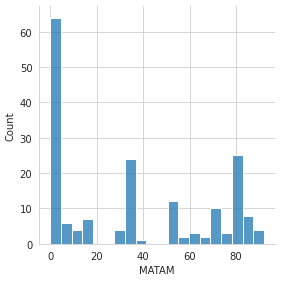

In [12]:
with sns.axes_style("whitegrid"):
    sns.displot(file["MATAM"],bins = 20,height = 4)

<AxesSubplot:xlabel='kind', ylabel='count'>

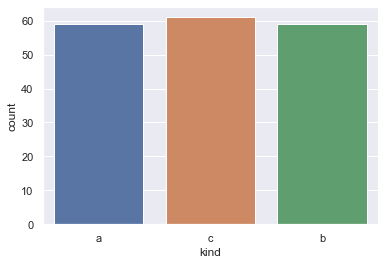

In [13]:
sns.set_theme() # 恢复默认主题
sns.countplot(data = file,x = "kind")

<AxesSubplot:>

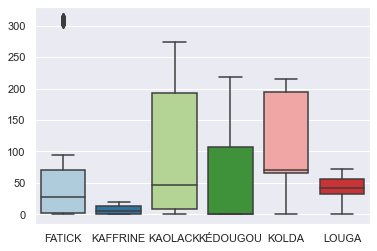

In [14]:
sns.boxplot(data = file[file.columns[3:9]], palette=sns.color_palette("Paired", 6))  

<AxesSubplot:>

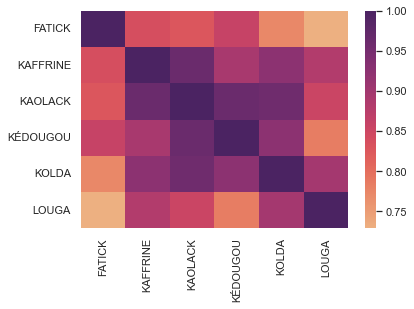

In [15]:
sns.heatmap(data = file[file.columns[3:9]].corr(), cmap = 'flare')  

<AxesSubplot:xlabel='MATAM', ylabel='Density'>

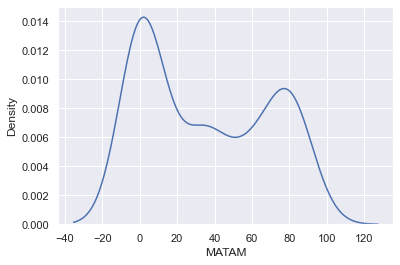

In [16]:
sns.kdeplot(data = file, x = "MATAM")

* distplot 数据分布绘图

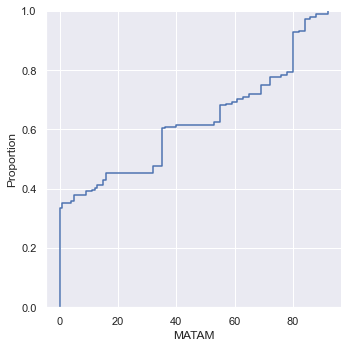

In [17]:
sns.displot(data = file,x = "MATAM",kind = "ecdf")

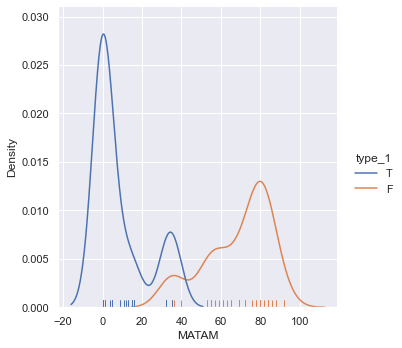

In [18]:
sns.displot(data = file, x = "MATAM"
            ,kind="kde",hue = 'type_1',rug = True)


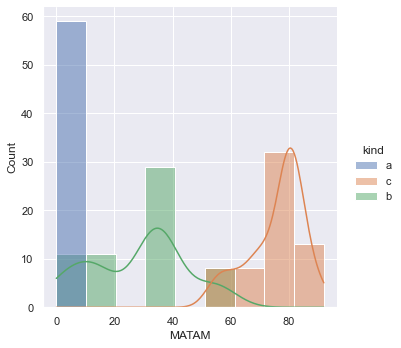

In [19]:
sns.displot(data = file,x = "MATAM",hue = 'kind', kde=True)

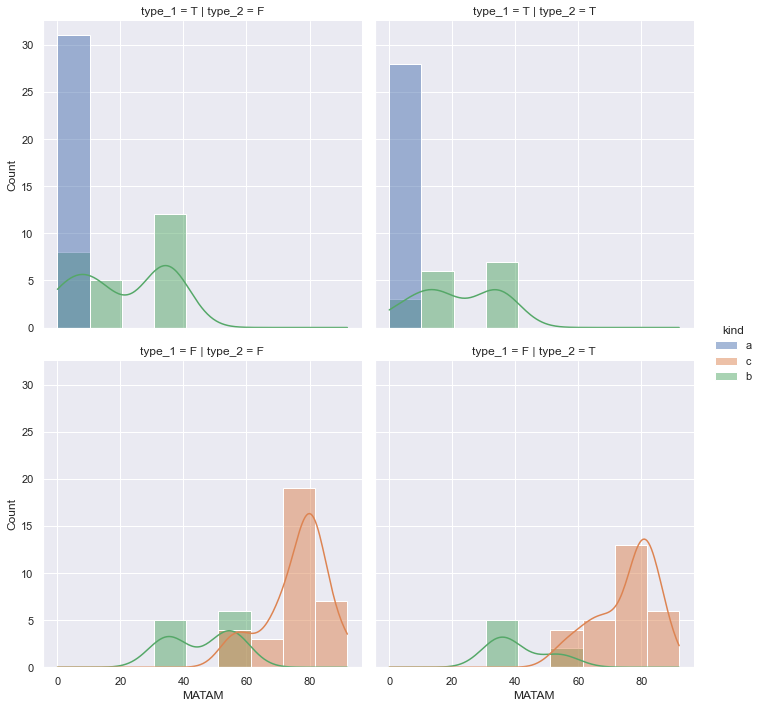

In [20]:
sns.displot(data = file,x="MATAM",row="type_1",
            col="type_2",hue="kind",kde = True)

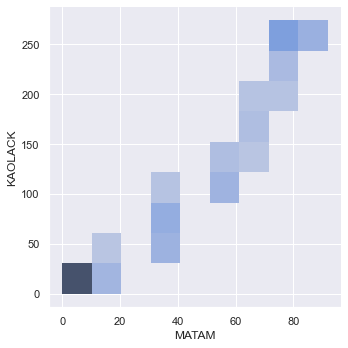

In [21]:
sns.displot(data = file, x = "MATAM", y = "KAOLACK")

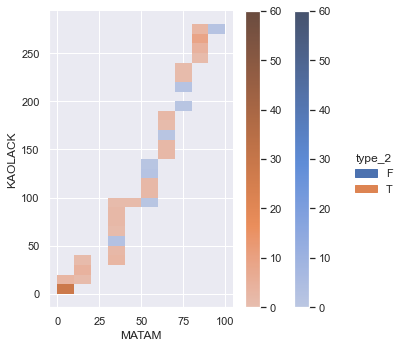

In [22]:
sns.displot(data = file, x = "MATAM", y = "KAOLACK",
            binwidth=(10, 10), cbar=True,hue = 'type_2')

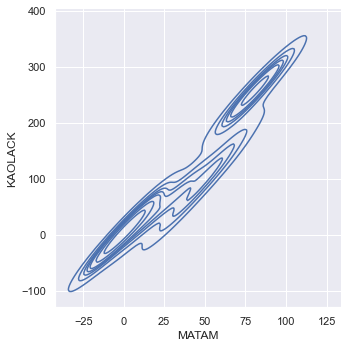

In [23]:
sns.displot(data = file, x = "MATAM", y = "KAOLACK", kind="kde", thresh = .05, levels = 8)

* jointplot 绘图

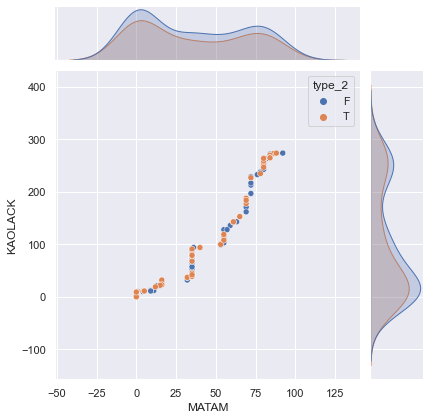

In [24]:
sns.jointplot(data = file, x = "MATAM", y = "KAOLACK", hue = 'type_2')

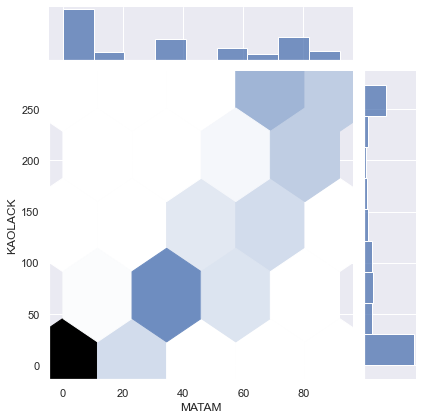

In [25]:
sns.jointplot(data = file, x = "MATAM", y = "KAOLACK", kind = "hex")

* relplot 数值关系绘图

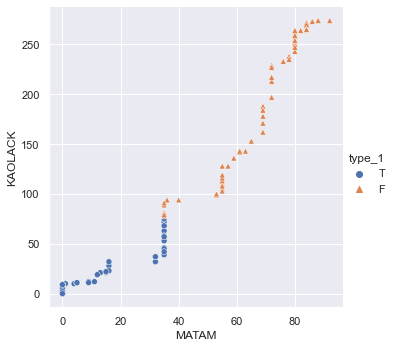

In [26]:
sns.relplot(data = file, x = "MATAM", y = "KAOLACK", hue = "type_1",
            style = 'type_1',markers=["o","^"])

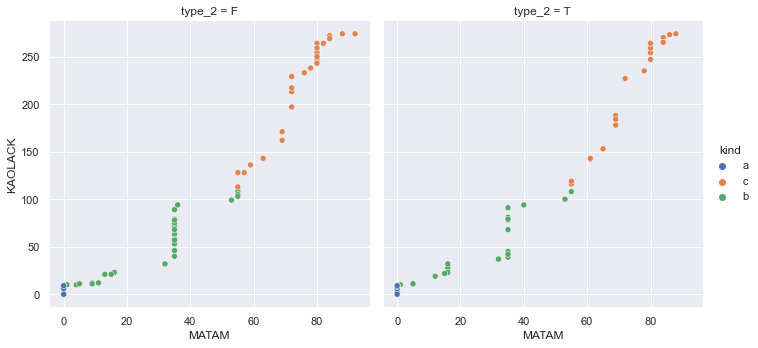

In [27]:
sns.relplot(data = file, x = "MATAM", y = "KAOLACK",col = "type_2",col_wrap=2, hue = "kind")

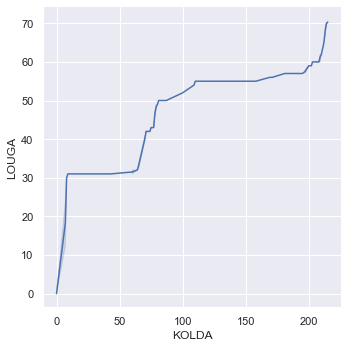

In [28]:
sns.relplot(data = file,x = "KOLDA",y = "LOUGA",kind = "line")

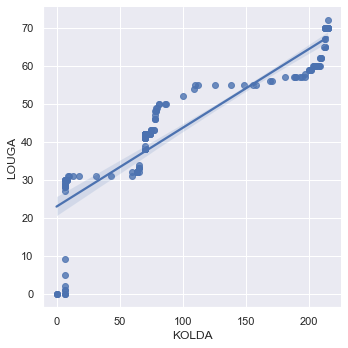

In [29]:
sns.lmplot(data = file,x = "KOLDA",y = "LOUGA")

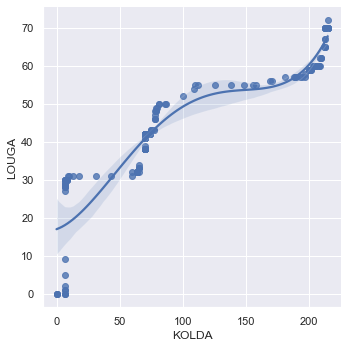

In [30]:
sns.lmplot(data = file,x = "KOLDA",y = "LOUGA", order = 4) # 更高次方程拟合

<AxesSubplot:xlabel='KOLDA', ylabel='LOUGA'>

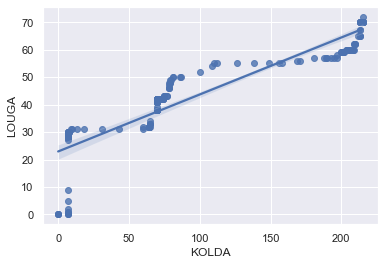

In [31]:
sns.regplot(data = file,x = "KOLDA",y = "LOUGA")

<AxesSubplot:xlabel='KOLDA', ylabel='LOUGA'>

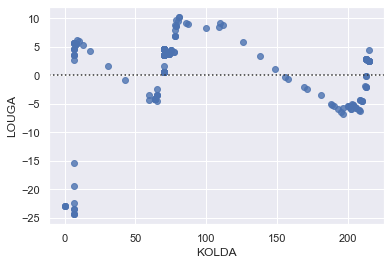

In [32]:
sns.residplot(data = file,x = "KOLDA",y = "LOUGA")

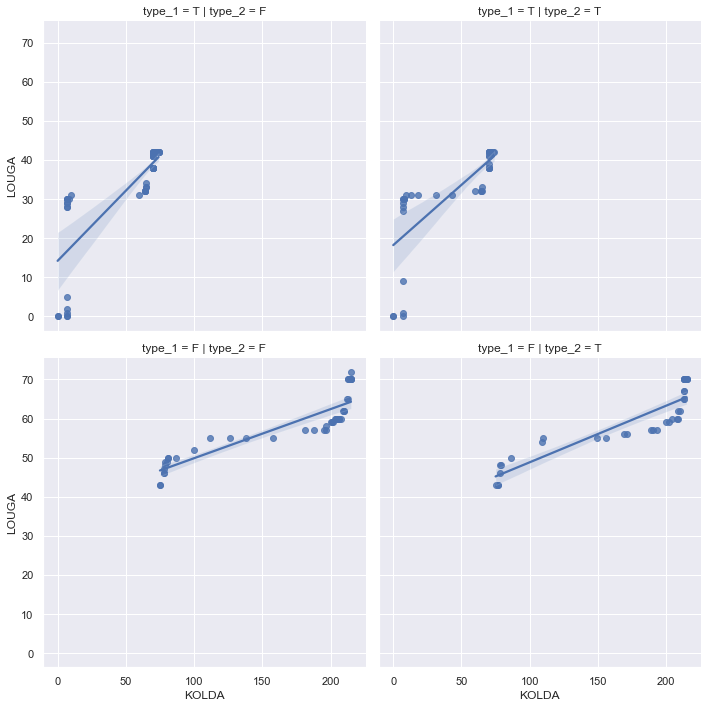

In [33]:
sns.lmplot(data = file,x = "KOLDA",y = "LOUGA",
            row = "type_1",col = "type_2")

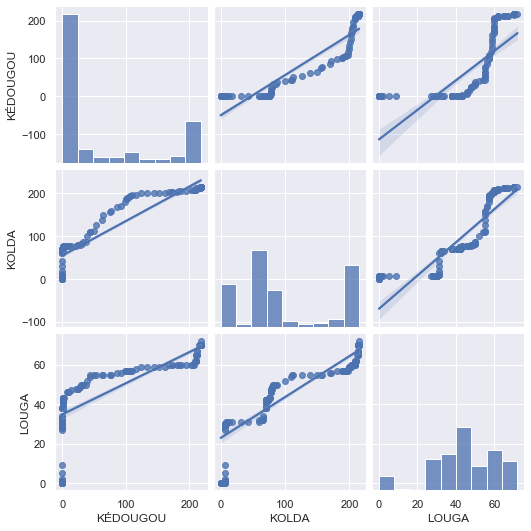

In [34]:
sns.pairplot(data = file[file.columns[6:9]],kind = "reg")

* catplot绘图

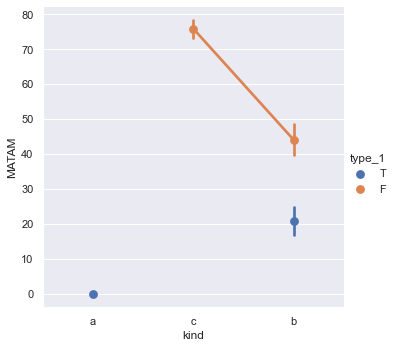

In [35]:
sns.catplot(data = file,x = "kind",y = "MATAM",kind = "point",hue = "type_1")

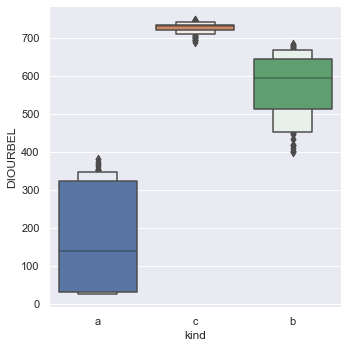

In [36]:
sns.catplot(data = file,x = "kind",y = "DIOURBEL",kind = "boxen") # 箱形图

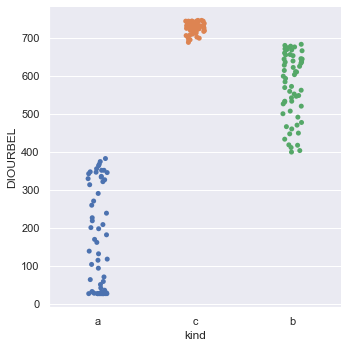

In [37]:
sns.catplot(data = file,x = "kind",y = "DIOURBEL",kind = "strip") # 散点图

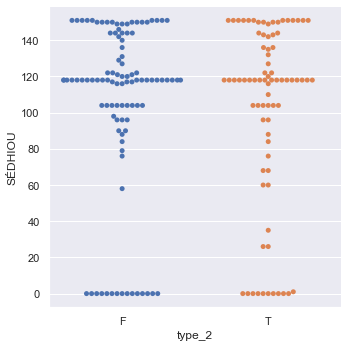

In [38]:
sns.catplot(data = file,x = "type_2",y = "SÉDHIOU",kind="swarm")

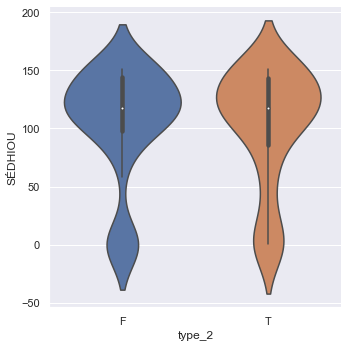

In [39]:
sns.catplot(data = file,x = "type_2",y = "SÉDHIOU",kind="violin") # 提琴图

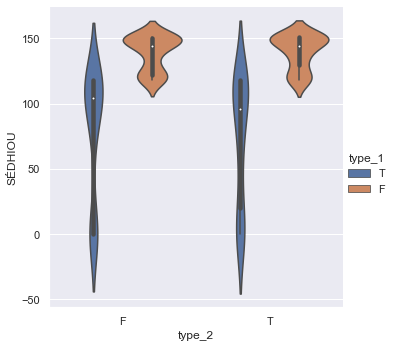

In [40]:
sns.catplot(data = file,x = "type_2",y = "SÉDHIOU",hue = "type_1",kind = "violin")

* FacetGrid 和 FacetGrid 绘图

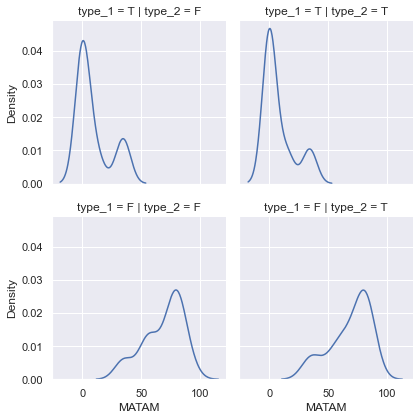

In [41]:
g = sns.FacetGrid(data = file,row = "type_1",col = "type_2")
g.map(sns.kdeplot,"MATAM")

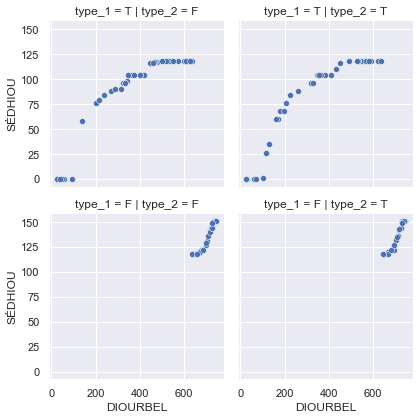

In [42]:
g = sns.FacetGrid(data = file,row = "type_1",col = "type_2")
g.map(sns.scatterplot,"DIOURBEL","SÉDHIOU")

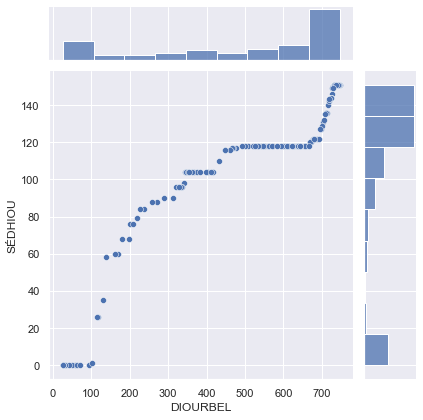

In [43]:
g = sns.JointGrid(data = file, x = "DIOURBEL", y = "SÉDHIOU")
g.plot(sns.scatterplot, sns.histplot)

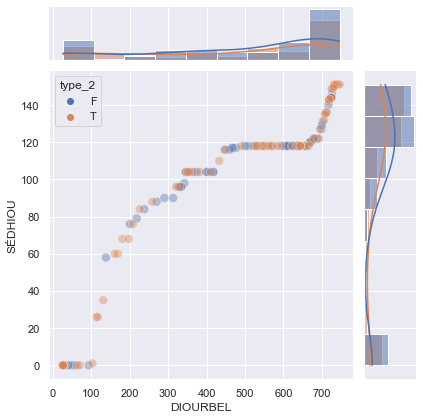

In [44]:
g = sns.JointGrid(data = file, x = "DIOURBEL", y = "SÉDHIOU",hue = 'type_2')
g.plot_joint(sns.scatterplot, s = 80, alpha =.4) # 点的大小和透明度
g.plot_marginals(sns.histplot, kde=True)